Snakes

In [2]:
import pandas as pd
import re

trash_df = pd.read_csv('../data/trash_hauler_report.csv')
#Explore the data
print(trash_df.shape)
print(trash_df.columns)
print(trash_df.dtypes)
print(trash_df.info())
trash_df.head()


(20226, 11)
Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')
Request Number        int64
Date Opened          object
Request              object
Description          object
Incident Address     object
Zip Code            float64
Trash Hauler         object
Trash Route          object
Council District    float64
State Plan X        float64
State Plan Y        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip 

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


In [104]:
from collections import Counter

In [118]:
import matplotlib.pyplot as plt

In [3]:
trash_df.columns = trash_df.columns.str.replace(' ', '_')

In [4]:
trash_df.rename(columns={'Request_' : 'Request'}, inplace=True)

In [5]:
trash_df.columns

Index(['Request_Number', 'Date_Opened', 'Request', 'Description',
       'Incident_Address', 'Zip_Code', 'Trash_Hauler', 'Trash_Route',
       'Council_District', 'State_Plan_X', 'State_Plan_Y'],
      dtype='object')

In [6]:
trash_df

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip_Code,Trash_Hauler,Trash_Route,Council_District,State_Plan_X,State_Plan_Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [7]:
import pandas as pd
import re

cleaned_missed_pickups = pd.read_csv('../data/cleaned_missed_pickups.csv')
#Explore the data
print(cleaned_missed_pickups.shape)
print(cleaned_missed_pickups.columns)
print(cleaned_missed_pickups.dtypes)
print(cleaned_missed_pickups.info())
cleaned_missed_pickups.head()

(17583, 13)
Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'description_clean',
       'Street Name'],
      dtype='object')
Request Number         int64
Date Opened           object
Request               object
Description           object
Incident Address      object
Zip Code             float64
Trash Hauler          object
Trash Route           object
Council District     float64
State Plan X         float64
State Plan Y         float64
description_clean     object
Street Name           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17583 entries, 0 to 17582
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request Number     17583 non-null  int64  
 1   Date Opened        17583 non-null  object 
 2   Request            17583 non-n

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,description_clean,Street Name
0,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,curb/trash miss tuesday.,Clarksville Pike
1,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,curb/trash miss tuesday.,Thunderbird Dr
2,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,missed,Old Matthews Rd
3,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,missed the even side of the road.,Croley Dr
4,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229,"trash out on time, miss again tuesday. alley",Jo Johnston Ave


In [228]:
missed_df=trash_df[trash_df['Description'] .str.contains('missed', case= False, na=False)]

In [230]:
print(missed_df.columns)

Index(['Request_Number', 'Date_Opened', 'Request', 'Description',
       'Incident_Address', 'Zip_Code', 'Trash_Hauler', 'Trash_Route',
       'Council_District', 'State_Plan_X', 'State_Plan_Y'],
      dtype='object')


In [232]:
trash_df.loc[:, 'clean_description'] = trash_df['Description'].str.lower().apply(
    lambda text: re.sub(r'[^\w\s]', '', text) if isinstance(text, str) else text
)

In [236]:
print(missed_df.columns)

Index(['Request_Number', 'Date_Opened', 'Request', 'Description',
       'Incident_Address', 'Zip_Code', 'Trash_Hauler', 'Trash_Route',
       'Council_District', 'State_Plan_X', 'State_Plan_Y'],
      dtype='object')


In [240]:
all_words = " ".join(missed_df['Description'].dropna()).split()



In [242]:
bigrams = list(zip(all_words, all_words[1:]))

In [244]:
print(bigrams)

[('missed', 'Missed'), ('Missed', 'the'), ('the', 'even'), ('even', 'side'), ('side', 'of'), ('of', 'the'), ('the', 'road.'), ('road.', 'Missed.'), ('Missed.', 'Trash'), ('Trash', 'missed'), ('missed', 'Tuesday'), ('Tuesday', 'again,'), ('again,', 'ALLEY'), ('ALLEY', 'Missed'), ('Missed', 'trash'), ('trash', 'pickup'), ('pickup', '-'), ('-', 'resident'), ('resident', 'has'), ('has', 'at'), ('at', 'curb'), ('curb', 'for'), ('for', 'pick'), ('pick', 'up'), ('up', 'today'), ('today', 'received'), ('received', 'back'), ('back', 'door'), ('door', 'form'), ('form', 'on'), ('on', '10/30/2017'), ('10/30/2017', 'is'), ('is', 'still'), ('still', 'in'), ('in', 'interoffice'), ('interoffice', 'mail'), ('mail', 'pickup'), ('pickup', 'since'), ('since', '10/30'), ('10/30', 'Missed-'), ('Missed-', '4th'), ('4th', 'week'), ('week', 'in'), ('in', 'a'), ('a', 'row.'), ('row.', 'Missed.'), ('Missed.', 'Does'), ('Does', 'not'), ('not', 'have'), ('have', 'access'), ('access', 'to'), ('to', 'alley.'), ('all

In [246]:
bigram_counts = Counter(bigrams)

In [248]:
top_bigrams = pd.DataFrame(bigram_counts.most_common(20), columns=['bigram', 'count'])

In [250]:
top_bigrams['bigram_str'] = top_bigrams['bigram'].apply(lambda x: " ".join(x))

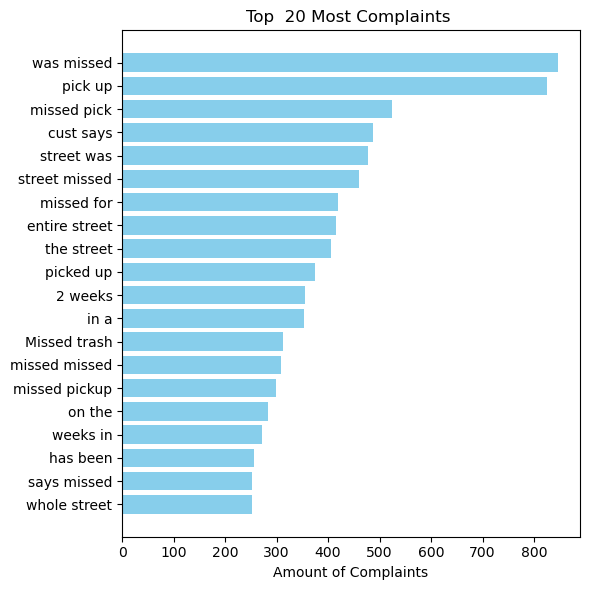

In [296]:
plt.figure(figsize=(6, 6))
plt.barh(top_bigrams['bigram_str'], top_bigrams['count'], color='skyblue')
plt.xlabel('Amount of Complaints')
plt.title('Top  20 Most Complaints ')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

In [254]:
top_20_bigrams = bigram_counts.most_common(20)

In [256]:
for bigram, count in top_20_bigrams:
    print(f"{bigram}: {count}")

('was', 'missed'): 847
('pick', 'up'): 825
('missed', 'pick'): 524
('cust', 'says'): 487
('street', 'was'): 478
('street', 'missed'): 461
('missed', 'for'): 420
('entire', 'street'): 415
('the', 'street'): 405
('picked', 'up'): 375
('2', 'weeks'): 356
('in', 'a'): 354
('Missed', 'trash'): 312
('missed', 'missed'): 309
('missed', 'pickup'): 299
('on', 'the'): 284
('weeks', 'in'): 271
('has', 'been'): 256
('says', 'missed'): 253
('whole', 'street'): 253


In [258]:
top_bigrams['bigram_str'] = top_bigrams['bigram'].apply(lambda x: " ".join(x))

In [260]:
missed_df['clean_description'] = missed_df['Description'].str.lower().apply(lambda text: re.sub(r'[^\w\s]', '', text) if isinstance(text, str) else text)

C:\Users\user\AppData\Local\Temp\ipykernel_11836\2916909965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_df['clean_description'] = missed_df['Description'].str.lower().apply(lambda text: re.sub(r'[^\w\s]', '', text) if isinstance(text, str) else text)


In [262]:
print(missed_df.head())

    Request_Number Date_Opened                               Request  \
3            25307    11/01/17  Trash - Curbside/Alley Missed Pickup   
4            25312    11/01/17  Trash - Curbside/Alley Missed Pickup   
8            25330    11/01/17  Trash - Curbside/Alley Missed Pickup   
9            25331    11/01/17  Trash - Curbside/Alley Missed Pickup   
10           25341    11/01/17  Trash - Curbside/Alley Missed Pickup   

                                          Description  \
3                                              missed   
4                   Missed the even side of the road.   
8                                             Missed.   
9                   Trash missed Tuesday again, ALLEY   
10  Missed trash pickup - resident has at curb for...   

                 Incident_Address  Zip_Code Trash_Hauler Trash_Route  \
3            2603 old matthews rd   37207.0    WASTE IND        2206   
4                   604 croley dr   37209.0    RED RIVER        4203   
8   4484

In [264]:
missed_count=missed_df.groupby('Trash Hauler')['Request Number'].nunique().reset_index()

KeyError: 'Trash Hauler'

In [ ]:
missed_count.columns

In [267]:
print(missed_count)

  Trash Hauler  Missed_Pickups  Amount_Owed
0        METRO            1759       351600
1        Metro              19         3600
2    RED RIVER            7753      1550400
3    WASTE IND             655       130800


In [269]:
fine_per_missed = 200
missed_count['Amount_Owed'] = missed_count['Missed_Pickups'].apply(
    lambda x: fine_per_missed * (x - 1) if x > 1 else 0
)


In [271]:
print(missed_count)

  Trash Hauler  Missed_Pickups  Amount_Owed
0        METRO            1759       351600
1        Metro              19         3600
2    RED RIVER            7753      1550400
3    WASTE IND             655       130800


In [274]:
Descriptions=missed_df['Description'].str.lower()

In [276]:
descriptions_clean = Descriptions.apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [278]:
word_string=descriptions_clean.str.split().explode()

In [280]:
stop_words = set([
    "the", "and", "to", "of", "a", "in", "for", "on", "with", "is", 
    "at", "by", "an", "this", "that", "it", "as", "i", "was", "were", 
    "are", "be", "has", "had", "have", "but", "or", "if", "not"
])

In [282]:
filter_word=word_string[~word_string.isin(stop_words)]

In [284]:
word_count=filter_word.value_counts()

In [286]:
print(word_count.head(30))

Description
missed         11043
trash           3144
street          2152
up              1764
pickup          1431
entire          1330
pick            1128
weeks            998
curb             859
cart             768
says             734
backdoor         708
2                685
week             671
again            621
last             617
been             616
alley            615
picked           578
whole            570
wednesday        562
out              516
cust             504
wants            471
tuesday          469
friday           436
row              422
trashmissed      419
others           412
they             408
Name: count, dtype: int64


In [288]:
trash hauler stats= missed_count.group by('Trash Hauler')['Amount_Owed'].agg(['sum','mean','median','mode']).reset_index

SyntaxError: invalid syntax (297853536.py, line 1)

In [290]:
trash_hauler_stats= missed_count.groupby('Trash Hauler')[].agg(['sum','mean','median','count']).reset_index

SyntaxError: invalid syntax (4065661106.py, line 1)

In [192]:
plt.bar(missed_count['Trash Hauler']owed by_hauler['Amount_Owed'])
plt.xlabel('Trash Hauler')
plt.ylabel('TotalAmount_Owed')
plt.title ('Total Amount Owed by Each Trash Hauler')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3898136444.py, line 1)

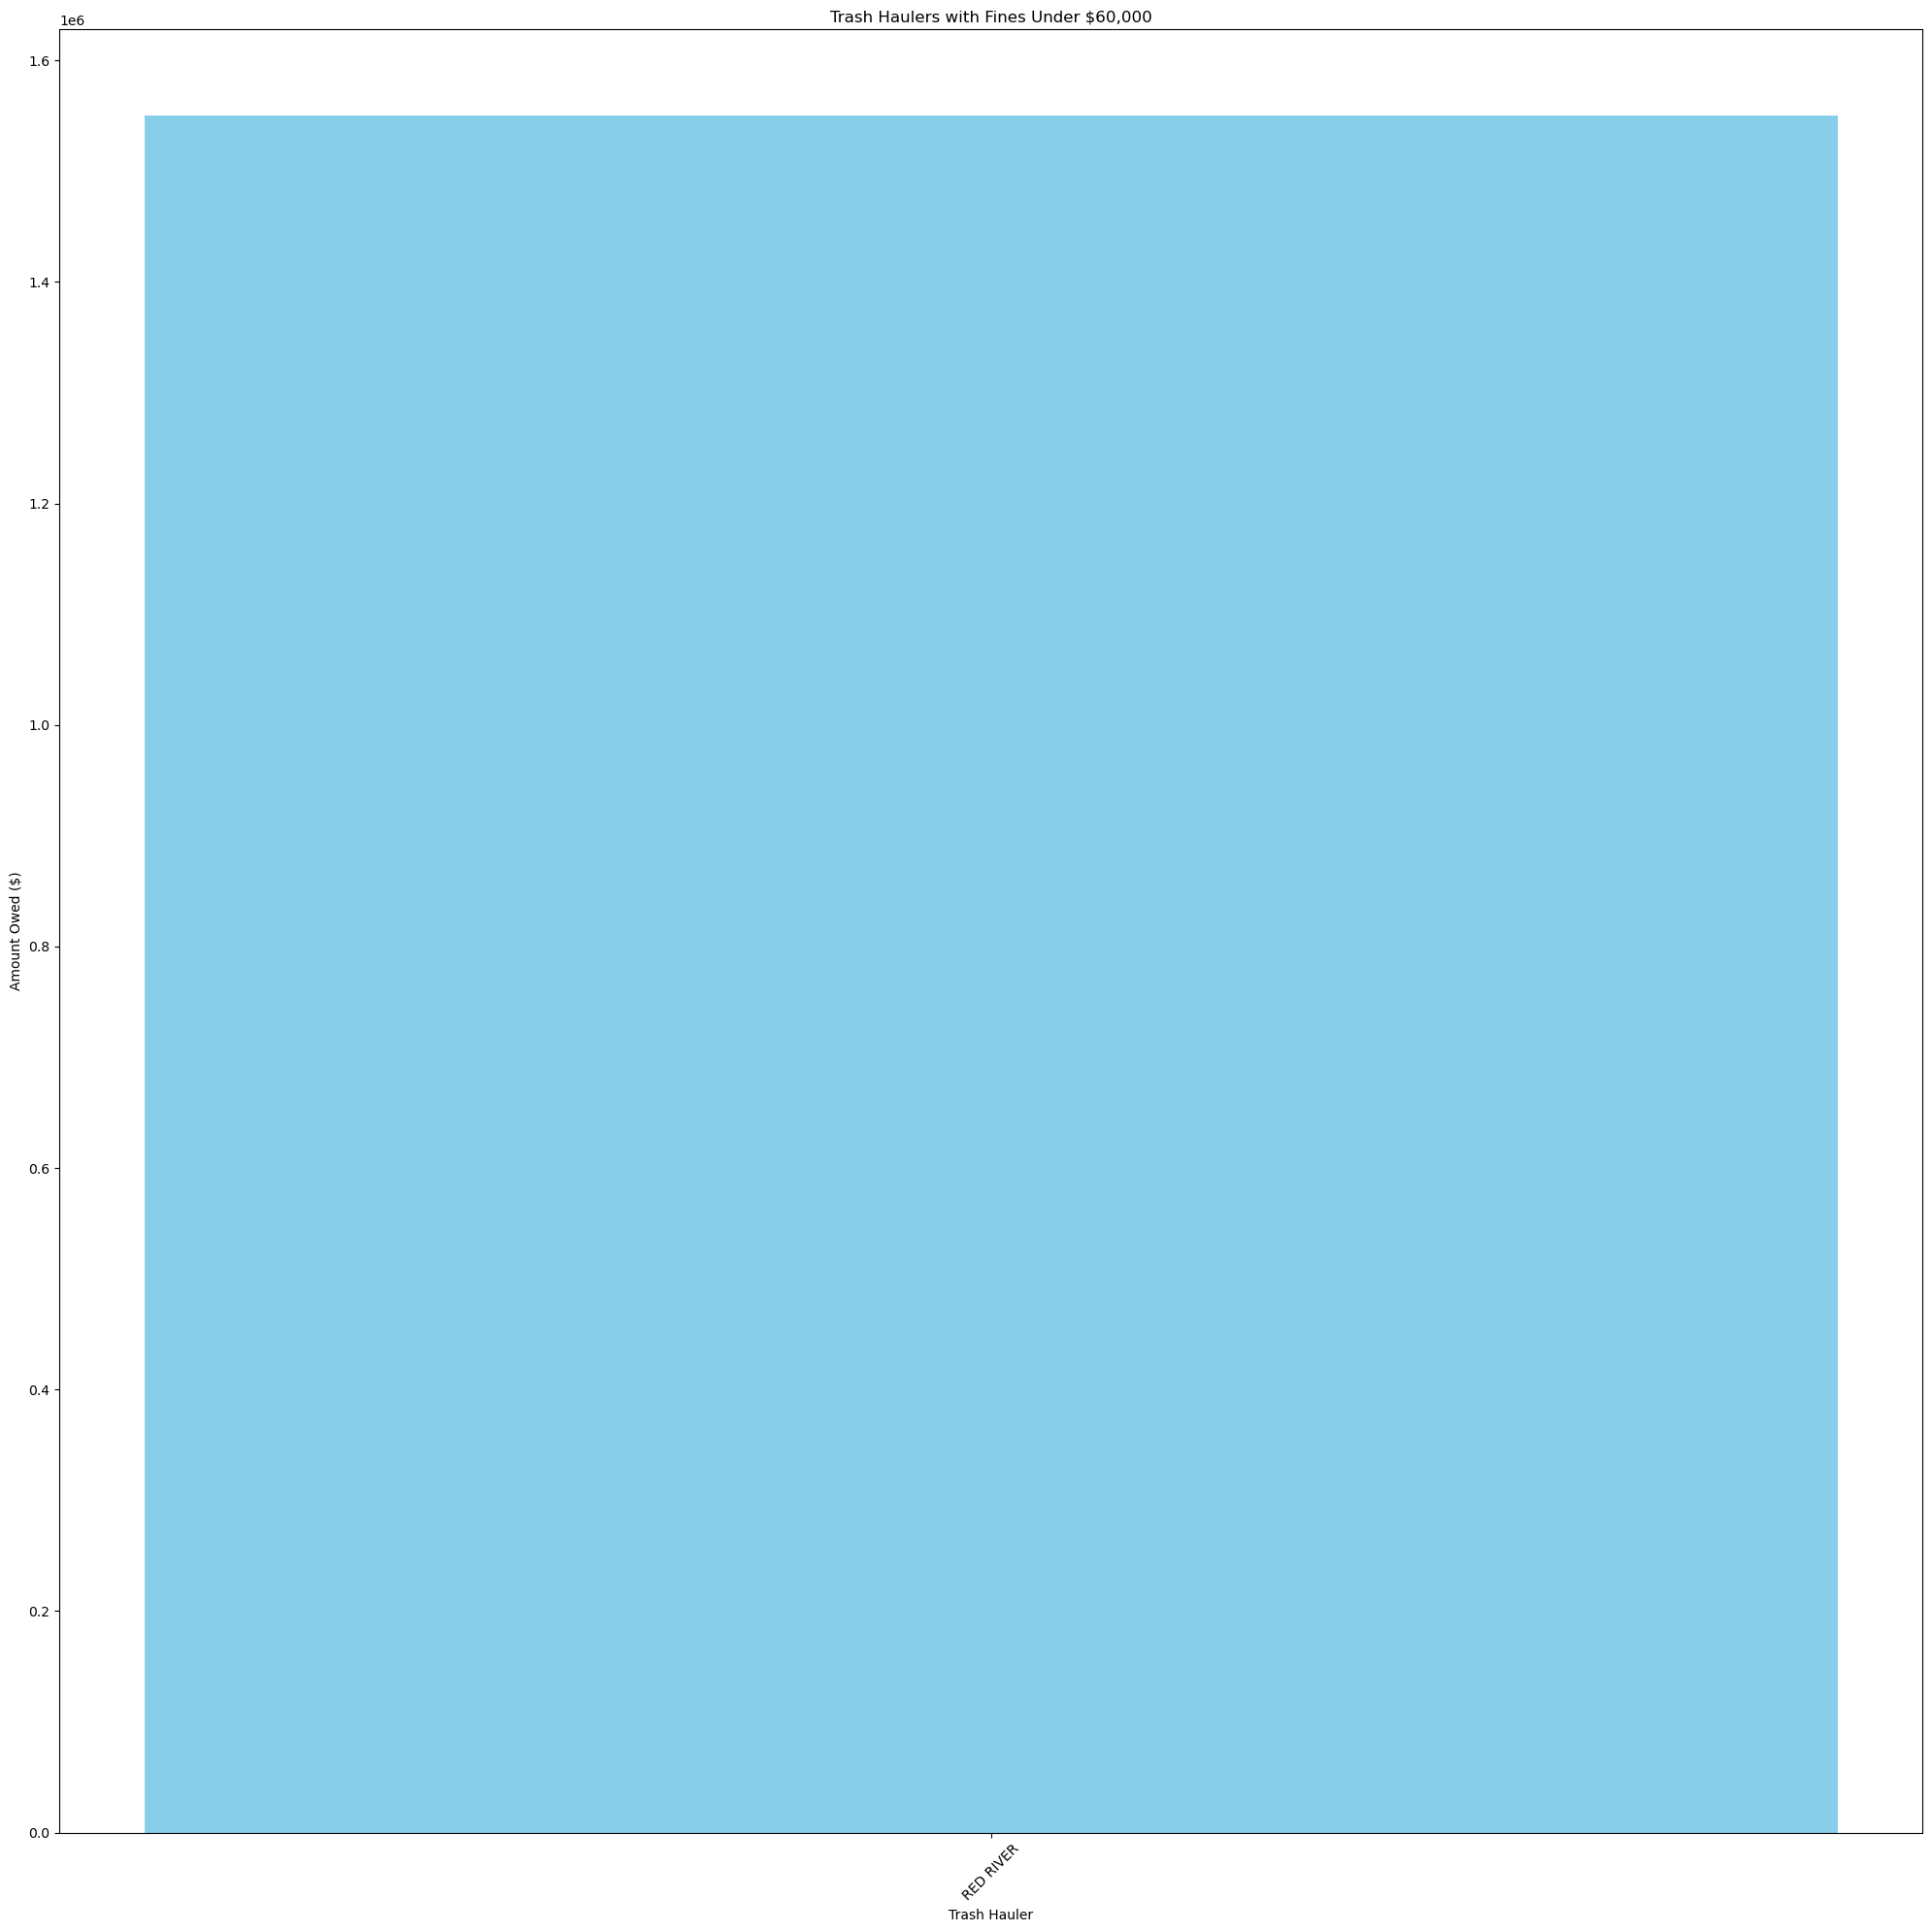

In [198]:
filtered_counts = missed_count[missed_count['Amount_Owed'] >400000]

plt.figure(figsize=(20,20))
plt.bar(filtered_counts['Trash Hauler'], filtered_counts['Amount_Owed'], color='skyblue')

plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Trash Haulers with Fines Under $60,000')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


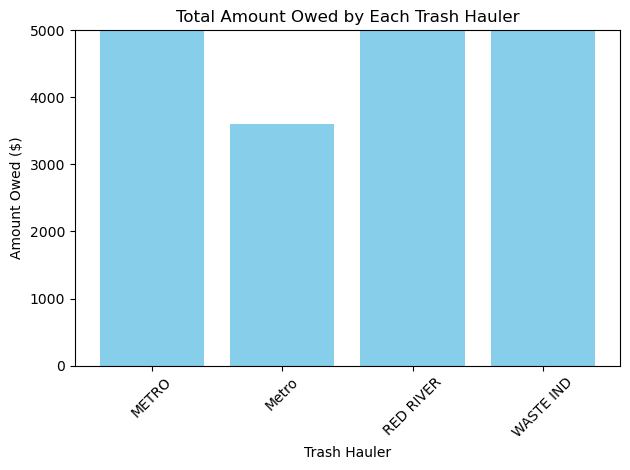

In [154]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.xticks(rotation=45)
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

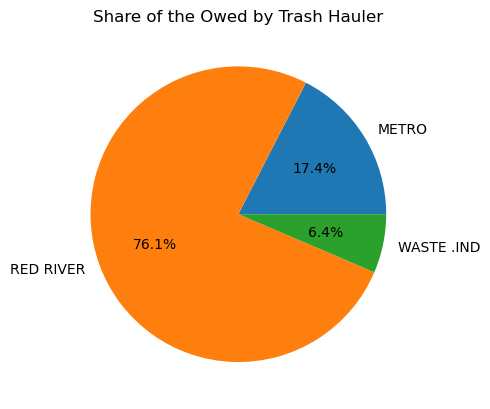

In [222]:
amount = [355200, 1550400, 130800]
labels = ['METRO', 'RED RIVER', 'WASTE .IND']

plt.pie(amount, labels=labels,autopct='%1.1f%%')
plt.title('Share of the Owed by Trash Hauler')
plt.show()


ValueError: No axis named 50000 for object type Series

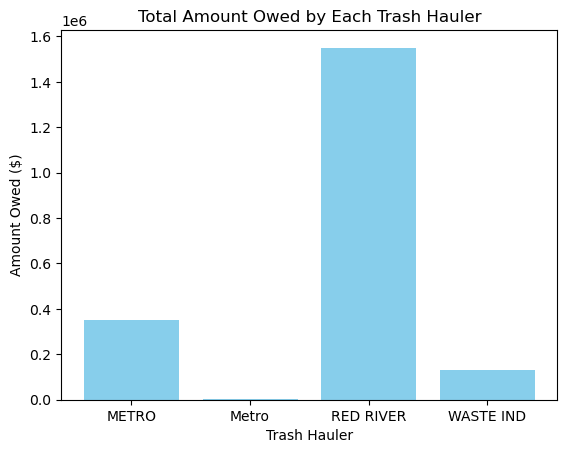

In [210]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.ylim(0,missed_count['Amount_Owed'].max(50000))
plt.tight_layout()
plt.show()

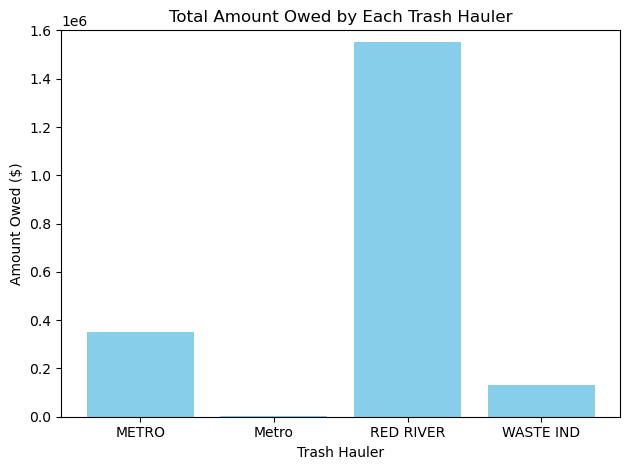

In [208]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.ylim(0,missed_count['Amount_Owed'].max()+50000)
plt.tight_layout()
plt.show()

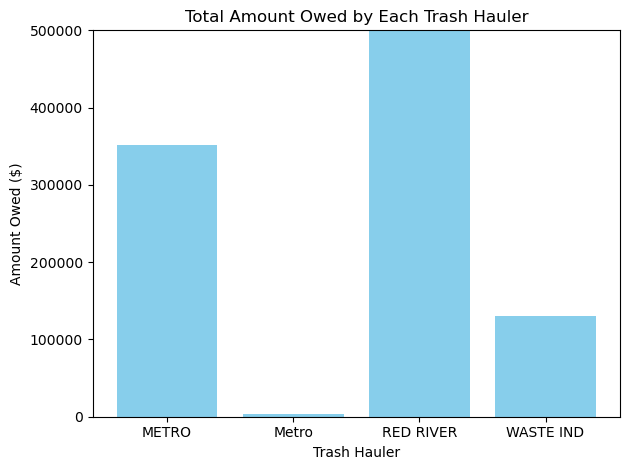

In [204]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.ylim(0,500000)
plt.tight_layout()
plt.show()

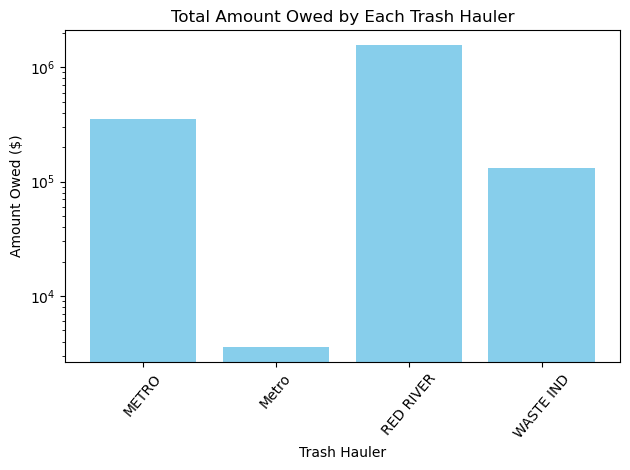

In [206]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount Owed ($)')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.xticks(rotation=50)
plt.yscale('log')
plt.tight_layout()
plt.show()


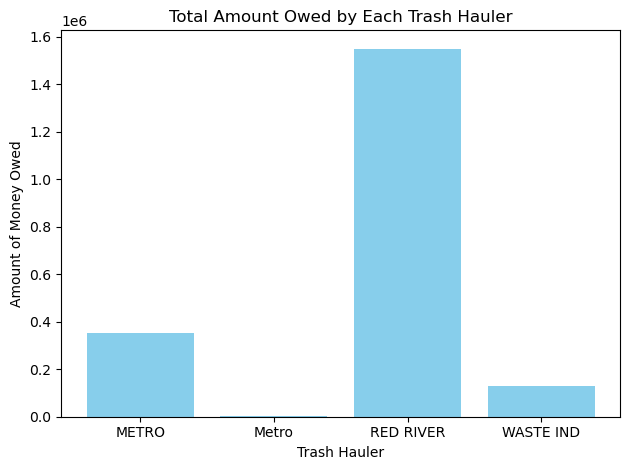

In [146]:
plt.bar(missed_count['Trash Hauler'], missed_count['Amount_Owed'], color='skyblue')
plt.xlabel('Trash Hauler')
plt.ylabel('Amount of Money Owed')
plt.title('Total Amount Owed by Each Trash Hauler')
plt.tight_layout()
plt.show()


In [ ]:
Print(missed_count)

In [ ]:
merged_df = pd.merge(cleaned_missed_pickups, trash_df, on='Request', how='right')

In [ ]:
missed_df=merged_df[merged_df['Description'] .str.contains('missed', case= False, na=False)]

In [ ]:
print('Filtered Missing Pickups:')